In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


### Import dataset

In [3]:
# import fashion mnist dataset in keras
fashion_mnist = keras.datasets.fashion_mnist
# split to train and test : (x_train, y_train) , (x_test, y_test)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Examine the Image Data

In [4]:
# 60,000 images in the training set, with each image represented as 28 x 28 pixels:
train_images.shape

(60000, 28, 28)

In [5]:
# 60,000 labels in the training set:
len(train_labels)

60000

In [6]:
#Number of labels: The labels are an array of integers, ranging from 0 to 9
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<Figure size 432x288 with 0 Axes>

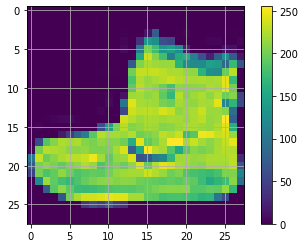

In [7]:
# plotting the first image out 60000.  Each pixel value fall in the range of 0 to 255:
plt.figure()
plt.figure()
plt.imshow(train_images[0]) # show image the first one
plt.colorbar()              # legend bar
plt.grid(True)              # show the grid
plt.show() # conclusion: bar is range from 0 where we don't have pixels and 250 where we have pixels

### Preprocess the dataset

In [8]:
# We have 28 x 28 pixels = 784 pixels indexed from 0 to 255(256). Scale these values to a range of 0 to 1 
# before feeding them to the neural network model
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

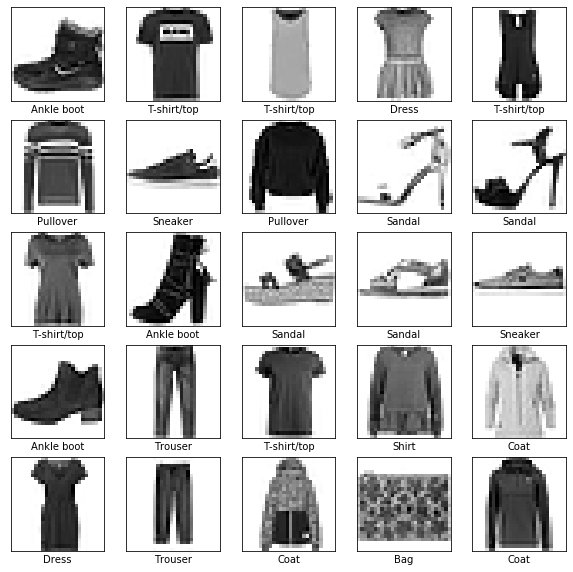

In [10]:
#To verify that the data is in the correct format and that you're ready to build and train the network
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# I- Using Keras: RNN

### Setup Neural Network Layers

In [11]:
# Input layer: Flattern " transform 2d array(28 x 28 pixels=784 pixels) to 1d array 784
# Hidden layer: Dense fully connected layer of 28 nodes(relu)
# Output layer: Dense fully connected layer of 10 nodes(softmax)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

### Compile the Model

In [12]:
# 1- Loss function —This measures how accurate the model is during training. Lesser the better
# 2- Optimizer —This is how the model is updated based on the data it sees and its loss function.
# 3- Metrics —Used to monitor the training and testing steps. It determine when to stop
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the Model

In [13]:
# 1-Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
# 2-The model learns to associate images and labels.
# 3-You ask the model to make predictions about a test set—in this example, the test_images array.
# 4-Verify that the predictions match the labels from the test_labels array.
model.fit(train_images, train_labels, epochs=10) # the number times that the learning algorithm will work through the entire training dataset.

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4989 - accuracy: 0.8227
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3762 - accuracy: 0.8650
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3377 - accuracy: 0.8762
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3127 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2933 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2794 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2677 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2569 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2482 - accuracy: 0.9071
Epoch 10/10
60

### Make Predictions

In [14]:
# 1- Evaluate accuracy: compare how the model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3568 - accuracy: 0.8783

Test accuracy: 0.8783


In [15]:
# Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
# predictions on test_images 
predictions = probability_model.predict(test_images)

In [17]:
# Verify: 10,000 images in the test set, with each image represented as 28 x 28 pixels:
test_images.shape

(10000, 28, 28)

In [18]:
# Verify size of the predictions
predictions.shape 

(10000, 10)

In [19]:
# Prediction of the 1er image: The result is an array of 10 elements. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing
predictions[0]

array([8.0683373e-07, 1.4973631e-08, 7.7069116e-09, 1.0846577e-08,
       8.9445751e-07, 2.2524307e-04, 1.1450229e-06, 2.8576808e-02,
       1.2517692e-08, 9.7119504e-01], dtype=float32)

<Figure size 432x288 with 0 Axes>

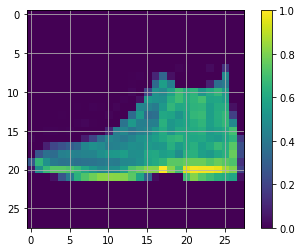

In [20]:
# Verfication
plt.figure()
plt.figure()
plt.imshow(test_images[0]) # show image the first one
plt.colorbar()              # legend bar
plt.grid(True)              # show the grid
plt.show() # conclusion: bar is range from 0 where we don't have pixels and 250 where we have pixels

In [21]:
#See which label has the highest confidence value:
np.argmax(predictions[0])

9

### Evaluate Model Results

In [22]:
# Evaluate the model part1 : Function to plot an image
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
  # Function to create the bar plot of the predictions  
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

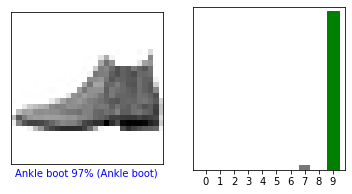

In [23]:
# display the image and the barplot
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

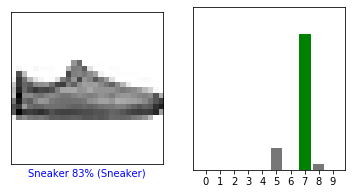

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

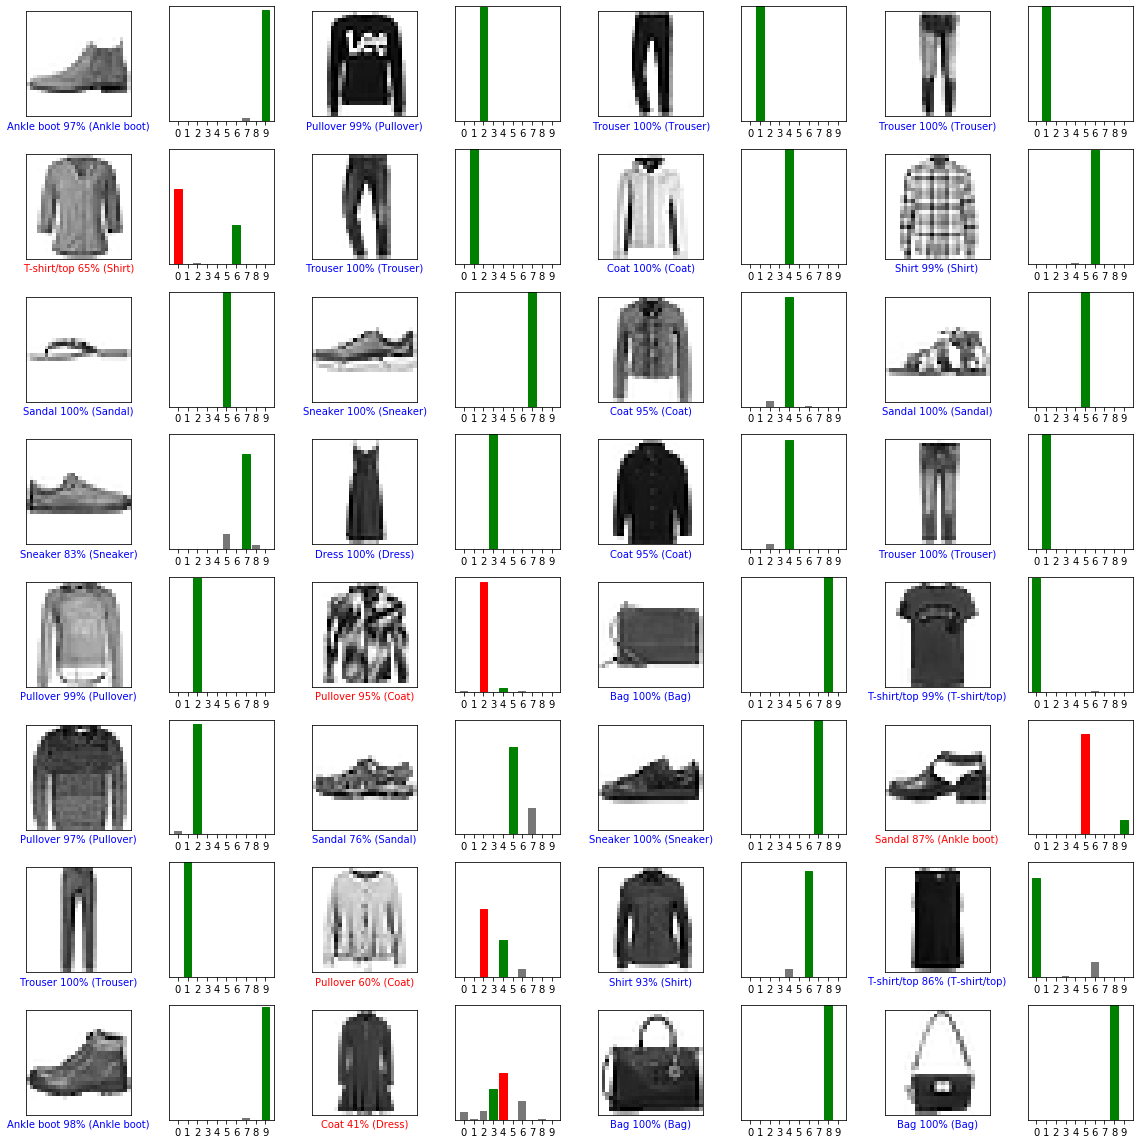

In [25]:
# Evaluate the model part2 :
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Prediction on Single Image

In [26]:
# Use the trained model
# Grab an image from the test dataset.
img = test_images[8]
print(img.shape)

(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [28]:
# Now predict the correct label for this image:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.4372270e-06 4.3721244e-08 1.5937200e-06 2.7925862e-09 7.1128619e-09
  9.9994946e-01 4.5624475e-08 4.7285324e-05 9.8776852e-08 2.8966614e-09]]


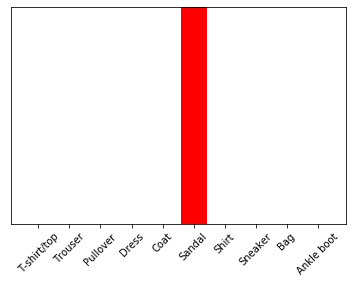

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

# II- Using ML:xgboost

In [30]:
!pip install pandas

In [31]:
!pip install seaborn

In [32]:
#Path
import os
# Pandas
import pandas as pd
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Seaborn
import seaborn as sns
#Sklearn
import xgboost as xgb
from xgboost import XGBClassifier
# accuracy calculation
from sklearn import metrics
from sklearn.model_selection import train_test_split # "from sklearn.model_selection" also used for cross_validation
#from PIL import Image
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize, StandardScaler
#import random
#from sklearn.ensemble import VotingClassifier
import time

In [33]:
start_time = time.time()

In [ ]:
# model fit : (x_train, y_train) , (x_test, y_test) <==>(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


### 1 - Convert from 3D to 2D

In [ ]:
# différent shape
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

In [38]:
# train_images is 60000 rows of 28x28 values so we will reshape in 60000x784
RESHAPED = 784
x_train_images_reshaped = train_images.reshape(60000, RESHAPED)
x_test_images_reshaped = test_images.reshape(10000, RESHAPED)

In [40]:
#  Verify the différent shape
print(x_train_images_reshaped.shape)
print(x_test_images_reshaped.shape)

(60000, 784)
(10000, 784)


In [42]:
# Convert train to float
x_train_images = x_train_images_reshaped.astype(np.float32)
y_train_images = train_labels.astype(np.float32)

# Convert test to float
x_test_images = x_test_images_reshaped.astype(np.float32)
y_test_images = test_labels.astype(np.float32)

In [43]:
# différent shape
print (x_train_images.shape, y_train_images.shape)
print (x_test_images.shape, y_test_images.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


### 2 - Standard scaling the pixel values with mean=0.0 and var=1.0

In [44]:
sc = StandardScaler()
x_train_images_std = sc.fit_transform(x_train_images)

### 3 - Splitting the train dataset into train and validation sets

In [46]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_images_std, y_train_images, test_size=0.1)

### 4 -Training XgBoost classifier on fashion-mnist dataset

In [47]:
param_list = [("eta", 0.08), ("max_depth", 6), ("subsample", 0.8), ("colsample_bytree", 0.8), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("alpha", 8), ("lambda", 2), ("num_class", 10)]
n_rounds = 600
early_stopping = 50
    
d_train = xgb.DMatrix(x_train, label= y_train)
d_val = xgb.DMatrix(x_valid, label= y_valid)
eval_list = [(d_train, "train"), (d_val, "validation")]
boost = xgb.train(param_list, d_train, n_rounds, evals=eval_list, early_stopping_rounds=early_stopping, verbose_eval=True)

[0]	train-merror:0.179074	validation-merror:0.195
Multiple eval metrics have been passed: 'validation-merror' will be used for early stopping.

Will train until validation-merror hasn't improved in 50 rounds.
[1]	train-merror:0.158722	validation-merror:0.174333
[2]	train-merror:0.152037	validation-merror:0.167333
[3]	train-merror:0.148315	validation-merror:0.1635
[4]	train-merror:0.146259	validation-merror:0.162667
[5]	train-merror:0.143296	validation-merror:0.162167
[6]	train-merror:0.140889	validation-merror:0.159833
[7]	train-merror:0.139222	validation-merror:0.158333
[8]	train-merror:0.138	validation-merror:0.156167
[9]	train-merror:0.136981	validation-merror:0.1565
[10]	train-merror:0.135963	validation-merror:0.155667
[11]	train-merror:0.134741	validation-merror:0.1555
[12]	train-merror:0.133685	validation-merror:0.153167
[13]	train-merror:0.133167	validation-merror:0.1515
[14]	train-merror:0.13237	validation-merror:0.152
[15]	train-merror:0.131148	validation-merror:0.150167
[16]	

[152]	train-merror:0.051	validation-merror:0.105333
[153]	train-merror:0.050667	validation-merror:0.1045
[154]	train-merror:0.050148	validation-merror:0.104667
[155]	train-merror:0.049741	validation-merror:0.104833
[156]	train-merror:0.049537	validation-merror:0.104833
[157]	train-merror:0.04913	validation-merror:0.1045
[158]	train-merror:0.048667	validation-merror:0.104
[159]	train-merror:0.048222	validation-merror:0.104333
[160]	train-merror:0.047907	validation-merror:0.1035
[161]	train-merror:0.047389	validation-merror:0.104
[162]	train-merror:0.047056	validation-merror:0.104
[163]	train-merror:0.046741	validation-merror:0.104167
[164]	train-merror:0.046389	validation-merror:0.103833
[165]	train-merror:0.045815	validation-merror:0.103833
[166]	train-merror:0.045704	validation-merror:0.104333
[167]	train-merror:0.04563	validation-merror:0.104167
[168]	train-merror:0.045278	validation-merror:0.104
[169]	train-merror:0.044944	validation-merror:0.1045
[170]	train-merror:0.044463	validat

[304]	train-merror:0.015852	validation-merror:0.096167
[305]	train-merror:0.015815	validation-merror:0.095833
[306]	train-merror:0.015759	validation-merror:0.095667
[307]	train-merror:0.015685	validation-merror:0.096
[308]	train-merror:0.015611	validation-merror:0.095667
[309]	train-merror:0.015537	validation-merror:0.096167
[310]	train-merror:0.015463	validation-merror:0.096667
[311]	train-merror:0.015296	validation-merror:0.0965
[312]	train-merror:0.015222	validation-merror:0.096167
[313]	train-merror:0.015167	validation-merror:0.0965
[314]	train-merror:0.01513	validation-merror:0.096333
[315]	train-merror:0.014907	validation-merror:0.096167
[316]	train-merror:0.014796	validation-merror:0.096167
[317]	train-merror:0.014685	validation-merror:0.095833
[318]	train-merror:0.014611	validation-merror:0.0955
[319]	train-merror:0.014574	validation-merror:0.095167
[320]	train-merror:0.014519	validation-merror:0.095167
[321]	train-merror:0.014333	validation-merror:0.095333
[322]	train-merror:0

[456]	train-merror:0.00587	validation-merror:0.092833
[457]	train-merror:0.005796	validation-merror:0.092833
[458]	train-merror:0.005741	validation-merror:0.093
[459]	train-merror:0.005759	validation-merror:0.093
[460]	train-merror:0.005667	validation-merror:0.093167
[461]	train-merror:0.005722	validation-merror:0.092833
[462]	train-merror:0.00563	validation-merror:0.093
[463]	train-merror:0.005556	validation-merror:0.093
[464]	train-merror:0.005556	validation-merror:0.092833
[465]	train-merror:0.005574	validation-merror:0.093
[466]	train-merror:0.005519	validation-merror:0.092667
[467]	train-merror:0.005556	validation-merror:0.093167
[468]	train-merror:0.005481	validation-merror:0.093
[469]	train-merror:0.005463	validation-merror:0.093
[470]	train-merror:0.005444	validation-merror:0.093167
[471]	train-merror:0.005389	validation-merror:0.092833
[472]	train-merror:0.005426	validation-merror:0.093
[473]	train-merror:0.005352	validation-merror:0.093
[474]	train-merror:0.005296	validation-

In [48]:
#Standard scaling the test-sets
x_test_images_std = sc.fit_transform(x_test_images)

### 5 - Predicting with trained classifiers

In [49]:
d_test = xgb.DMatrix(data=x_test_images_std)
y_pred = boost.predict(d_test)

### 6 - Checking accuracy for fashion

In [52]:
np.sum(y_pred == y_test_images) / y_test_images.shape

array([0.8974])